# Figure 3 - Identifying the 50 most important SNPs from the random forest algorithm 

In [21]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.impute
import sklearn.ensemble
import scipy.stats
import matplotlib as mpl
import seaborn as sns
#import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['figure.dpi'] = 300
pd.set_option('display.max_rows', 50)

df = pd.read_csv("COVID19_GWAS_downsampled_population.csv", sep=",", header=0, index_col=0)
display(df)

,class,rs140604514,rs75811734,rs12127714,rs12139500,rs190204955,rs56270766,rs10922911,rs10801825,rs10801826,...,rs113439507,rs112426803,rs111718325,rs75585764,rs74766371,rs9983330,rs12329760,rs150868259,rs142121339,rs191514675
subject,,,,,,,,,,,,,,,,,,,,,
s3787,case,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
s1411,case,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
s5344,case,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
s2724,case,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0
s4299,case,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s677626,control,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
s330941,control,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
s754782,control,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0


In [23]:
covid_Set = df
#split sets
Y = covid_Set["class"].map({"case":1,"control":0}).to_numpy() #which column is the target and map to binary
X = covid_Set.iloc[:,0:]
X = covid_Set.drop(columns=["class"])
X

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, train_size = 0.85, stratify=Y)

#Random forest
clf = RandomForestClassifier(n_estimators=50,
                               min_samples_split= 5,
                              min_samples_leaf= 1,
                              max_features= None,
                              max_depth= None,
                              criterion= 'entropy',
                              bootstrap= True
) 
  
clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_split=5, n_estimators=50)

In [25]:
feat_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

#find the top 50 features by feature importance
top50s=feat_importance.nlargest(50)
top50s.to_frame()

print(f"top 50:{top50s}")

top 50:rs1381383189    0.099538
rs79932110      0.086187
rs73064425      0.073692
rs139478596     0.063911
rs117245307     0.044732
rs78919248      0.040454
rs10734222      0.030562
rs34326463      0.020970
rs3774641       0.018684
rs1265111       0.018175
rs600038        0.016679
rs3785928       0.014911
rs144309607     0.014479
rs16956299      0.013772
rs35605052      0.011695
rs1976367       0.011665
rs115679256     0.011657
rs62064393      0.011384
rs76281521      0.011298
rs13098271      0.011244
rs17860142      0.010111
rs1291122587    0.009357
rs34847985      0.009131
rs62056851      0.008992
rs17860241      0.008364
rs2190636       0.008270
rs9824886       0.008156
rs66517037      0.008035
rs1724412       0.006346
rs528372660     0.005996
rs62056909      0.005774
rs1604069       0.005749
rs8072451       0.005594
rs12482556      0.005465
rs13064616      0.005075
rs9636867       0.004813
rs11130082      0.004745
rs17127606      0.003900
rs12485978      0.003895
rs1601867       0.

In [ ]:
#top50s.to_csv('op50SNPs_barplot.csv')

In [17]:
df = pd.read_csv("top50SNPs_barplot.csv", sep=",", header=0, index_col=0)
len(df.index)

50

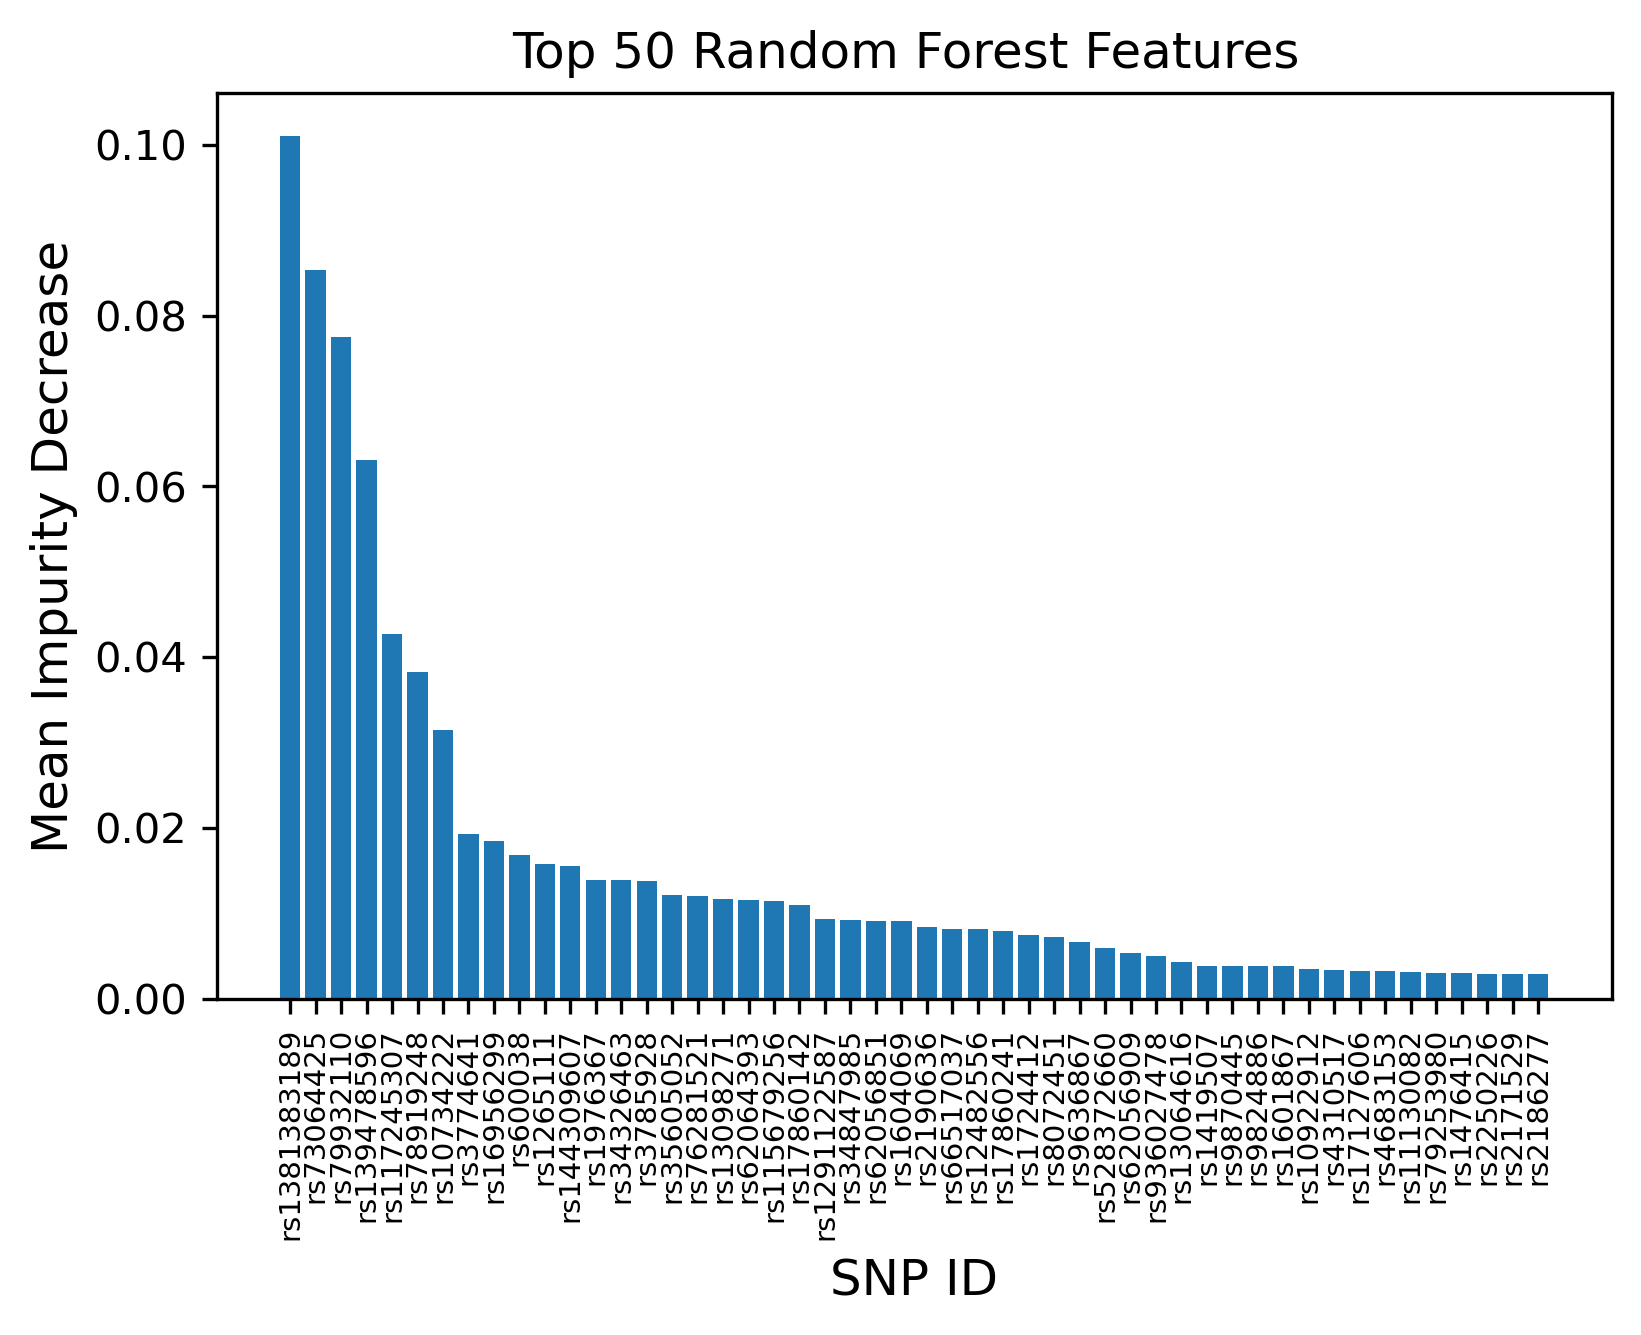

In [20]:
y_pos = np.arange(50)
plt.bar(y_pos,df.Feature_importance)
plt.xticks(y_pos, df.index, rotation = 90,size = 7)
plt.yticks(size = 10)
plt.xlabel("SNP ID", size = 12)
plt.ylabel("Mean Impurity Decrease",size = 12)
plt.title("Top 50 Random Forest Features ",size = 12)
plt.show()

# The top 50 SNPs were mapped to genes using the annotations provided by the COVID-19 Host Genetics Initiative website. The tool provided in the https://app.covid19hg.org/?analysisId=r4-leave_23andme-B2_ALL website was used to generate the Manhattan plot. 

# These top 50 genes were used as a ranked list in g:profiler and cytoscape to perform pathway enrichment analysis. 